In [290]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/taekyounglee/Documents/projects/Finance_Project_COVID19_ETF/data/temp_df_final.csv', index_col = 0).iloc[:, 1:]

etf = "TIGER200_IT"
exog = "decideCnt_diff_perc"
target = 'diff_5'

file_path = f'/Users/taekyounglee/Documents/projects/Finance_Project_COVID19_ETF/data/섹터ETF취합/Add_TI_섹터ETF/{etf}_TI.csv'

df2 = pd.read_csv(file_path, index_col = 0)
df
df2

,날짜,종가,diff_5,diff_20,ma_5,ma_20
1119,2019-09-05,6325.0,0.030970,-0.007064,6289.0,6226.00
1118,2019-09-06,6360.0,0.012739,-0.002353,6305.0,6225.25
1117,2019-09-09,6410.0,0.019078,0.005490,6329.0,6227.00
1116,2019-09-10,6550.0,0.050521,0.044657,6392.0,6241.00
1115,2019-09-11,6625.0,0.049089,0.071140,6454.0,6263.00
...,...,...,...,...,...,...
4,2024-03-15,8370.0,0.033972,0.124244,8256.0,7931.25
3,2024-03-18,8265.0,0.029265,0.074772,8303.0,7960.00
2,2024-03-19,8120.0,0.008696,0.029803,8317.0,7971.75
1,2024-03-20,8200.0,-0.006663,0.067014,8306.0,7997.50


### 날짜 형식 변환

In [291]:
# Converting 'stateDt' to datetime format
df['stateDt'] = pd.to_datetime(df['stateDt'], format='%Y%m%d')


# Renaming the 'stateDt' column to 'Date'
df.rename(columns={'stateDt': 'Date'}, inplace=True)


df.tail()  # Display the last few rows to check the changes


,Date,decideCnt,deathCnt
1106,2023-04-15,30978954.0,34368.0
1107,2023-04-17,30994088.0,34376.0
1108,2023-04-18,31009261.0,34386.0
1109,2023-04-19,31025769.0,34392.0
1110,2023-04-20,31039863.0,34401.0


In [292]:
# '날짜'와 '종가' 컬럼 이름 변경
df2.rename(columns={'날짜': 'Date', '종가': 'Close'}, inplace=True)
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y-%m-%d')
df2['diff_1'] = df2['Close'].pct_change()





df2.head()  # 변경된 데이터프레임의 마지막 몇 행을 확인합니다.


,Date,Close,diff_5,diff_20,ma_5,ma_20,diff_1
1119,2019-09-05,6325.0,0.030970,-0.007064,6289.0,6226.00,NaN
1118,2019-09-06,6360.0,0.012739,-0.002353,6305.0,6225.25,0.005534
1117,2019-09-09,6410.0,0.019078,0.005490,6329.0,6227.00,0.007862
1116,2019-09-10,6550.0,0.050521,0.044657,6392.0,6241.00,0.021841
1115,2019-09-11,6625.0,0.049089,0.071140,6454.0,6263.00,0.011450


### 외생변수 데이터 5일 차분 변환

In [293]:
# df에서 decideCnt와 deathCnt의 차이를 계산하고, 이를 %로 변환
df['decideCnt_diff'] = df['decideCnt'].diff().fillna(0)
df['deathCnt_diff'] = df['deathCnt'].diff().fillna(0)
df['decideCnt_diff_perc'] = df['decideCnt_diff'] / df['decideCnt'].shift(5)
df['deathCnt_diff_perc'] = df['deathCnt_diff'] / df['deathCnt'].shift(5)
df.replace([np.inf, -np.inf], np.nan, inplace=True)  # 무한대 값을 NaN으로 대체

# df2와 df를 'Date' 기준으로 합치기
df_combined = pd.merge(df2, df[['Date', 'decideCnt_diff_perc', 'deathCnt_diff_perc']], on='Date', how='outer')

# NaN이 포함된 행 제거
df_combined.dropna(inplace=True)

df_combined.tail()

,Date,Close,diff_5,diff_20,ma_5,ma_20,diff_1,decideCnt_diff_perc,deathCnt_diff_perc
891,2023-04-14,6260.0,0.031301,0.020375,6122.0,6106.75,0.024550,0.000377,0.000146
892,2023-04-17,6240.0,0.033113,0.021277,6162.0,6113.25,-0.003195,0.000489,0.000233
893,2023-04-18,6245.0,0.025452,0.016273,6193.0,6118.25,0.000801,0.000490,0.000291
894,2023-04-19,6320.0,0.034370,0.022654,6235.0,6125.25,0.012010,0.000533,0.000175
895,2023-04-20,6355.0,0.040098,0.030819,6284.0,6134.75,0.005538,0.000455,0.000262


In [294]:
df_combined



,Date,Close,diff_5,diff_20,ma_5,ma_20,diff_1,decideCnt_diff_perc,deathCnt_diff_perc
116,2020-02-27,5885.0,-0.046964,-0.085470,5917.0,6240.25,0.004266,1.166282,0.500000
117,2020-02-28,5755.0,-0.055008,-0.098669,5850.0,6208.75,-0.022090,0.948505,0.000000
118,2020-03-02,5685.0,-0.028205,-0.106132,5817.0,6175.00,-0.012163,0.377478,0.333333
119,2020-03-03,5650.0,-0.042373,-0.108129,5767.0,6140.75,-0.006157,0.339751,0.461538
120,2020-03-04,5730.0,-0.022184,-0.104688,5741.0,6107.25,0.014159,0.220796,0.307692
...,...,...,...,...,...,...,...,...,...
891,2023-04-14,6260.0,0.031301,0.020375,6122.0,6106.75,0.024550,0.000377,0.000146
892,2023-04-17,6240.0,0.033113,0.021277,6162.0,6113.25,-0.003195,0.000489,0.000233
893,2023-04-18,6245.0,0.025452,0.016273,6193.0,6118.25,0.000801,0.000490,0.000291
894,2023-04-19,6320.0,0.034370,0.022654,6235.0,6125.25,0.012010,0.000533,0.000175


### Window Size 별로 Lag와 P-value 찍기

In [295]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Window 및 max lag 설정
windows = [20, 40, 60, 120]
max_lags = {20: 5, 40: 11, 60: 18, 120: 38}

# 최적 lag와 해당 p-value를 반환하는 함수 (lag를 0으로 만들지 않고, 단순히 p-value가 가장 작은 lag를 선택)
def optimal_lag_pvalues(df_combined, window, max_lag):
    optimal_lags = []
    p_values = []
    for start in tqdm(range(len(df_combined) - window + 1), desc=f'Processing Window {window}'):
        sub_df_combined = df_combined.iloc[start:start + window]
        best_p_value = float('inf')
        best_lag = 0
        for lag in range(1, max_lag + 1):
            result = grangercausalitytests(sub_df_combined[[target, exog]], maxlag=lag, verbose=False)
            p_value = result[lag][0]['ssr_ftest'][1]
            if p_value < best_p_value:
                best_p_value = p_value
                best_lag = lag
        # lag가 0이 되지 않도록, 최적의 p-value에 해당하는 lag를 저장
        optimal_lags.append(best_lag)
        p_values.append(best_p_value)
    
    return optimal_lags + [np.nan] * (window - 1), p_values + [np.nan] * (window - 1)

# 각 window에 대한 최적 lag 및 p-value 계산
for window in windows:
    max_lag = max_lags[window]
    df_combined[f'optimal_lag_{window}'], df_combined[f'p_value_{window}'] = optimal_lag_pvalues(df_combined, window, max_lag)



Processing Window 120: 100%|██████████| 634/634 [09:39<00:00,  1.09it/s]


### 시각화 - Lag는 Bar, P-value는 Line

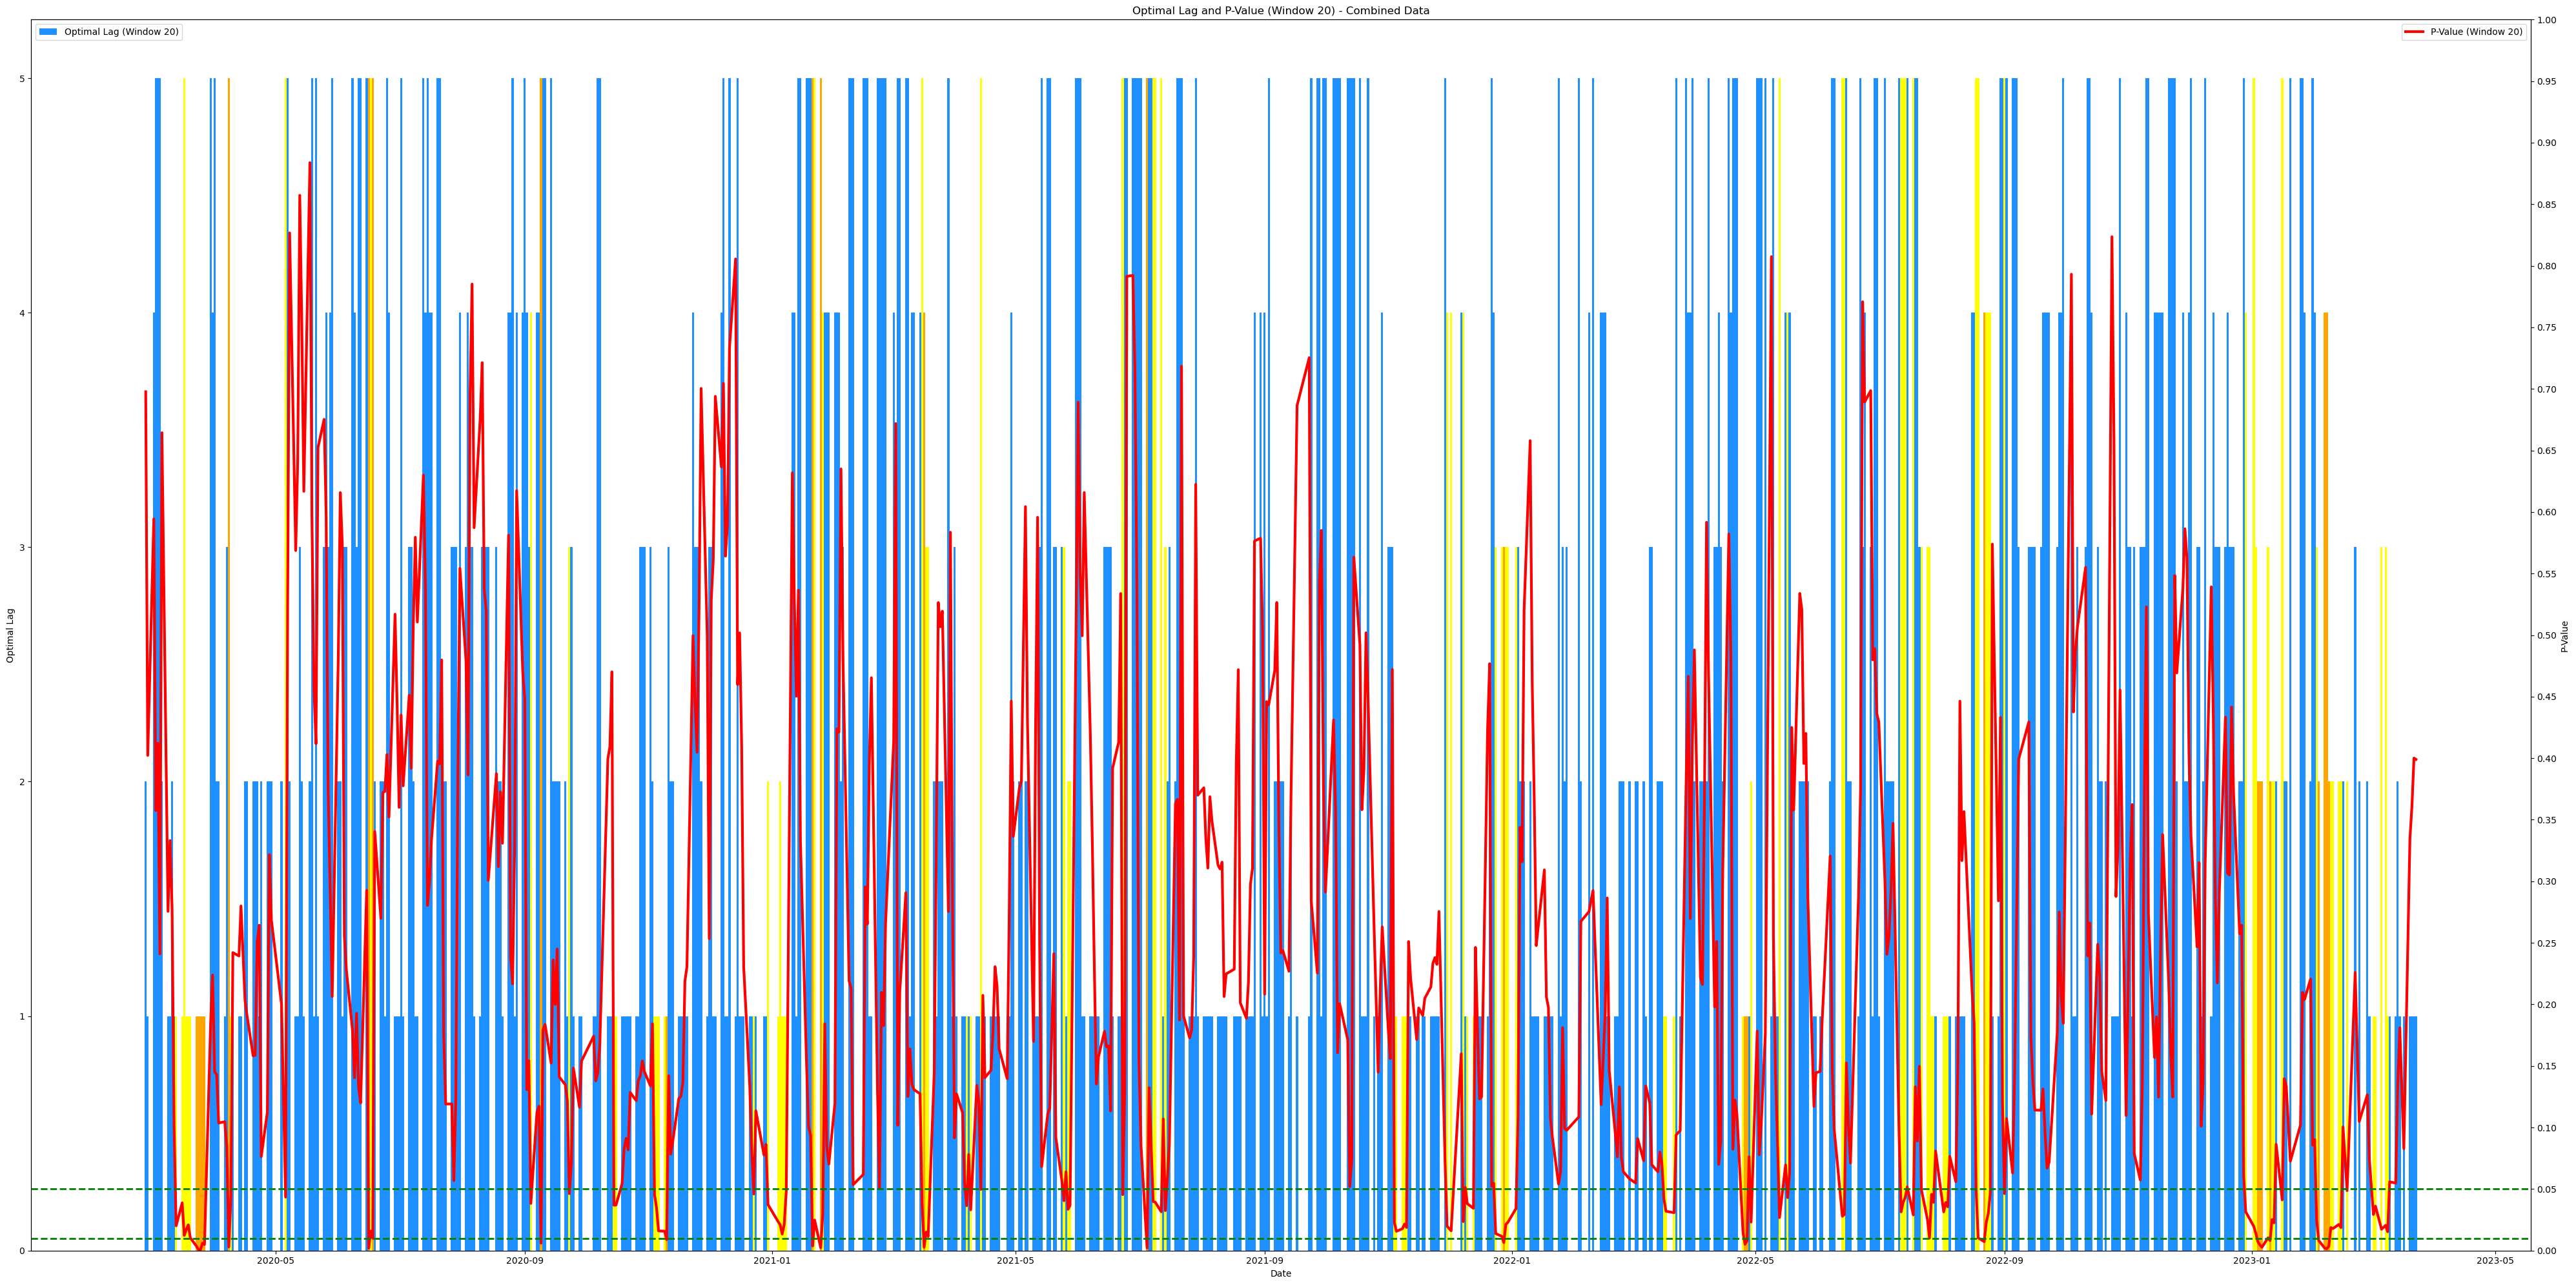

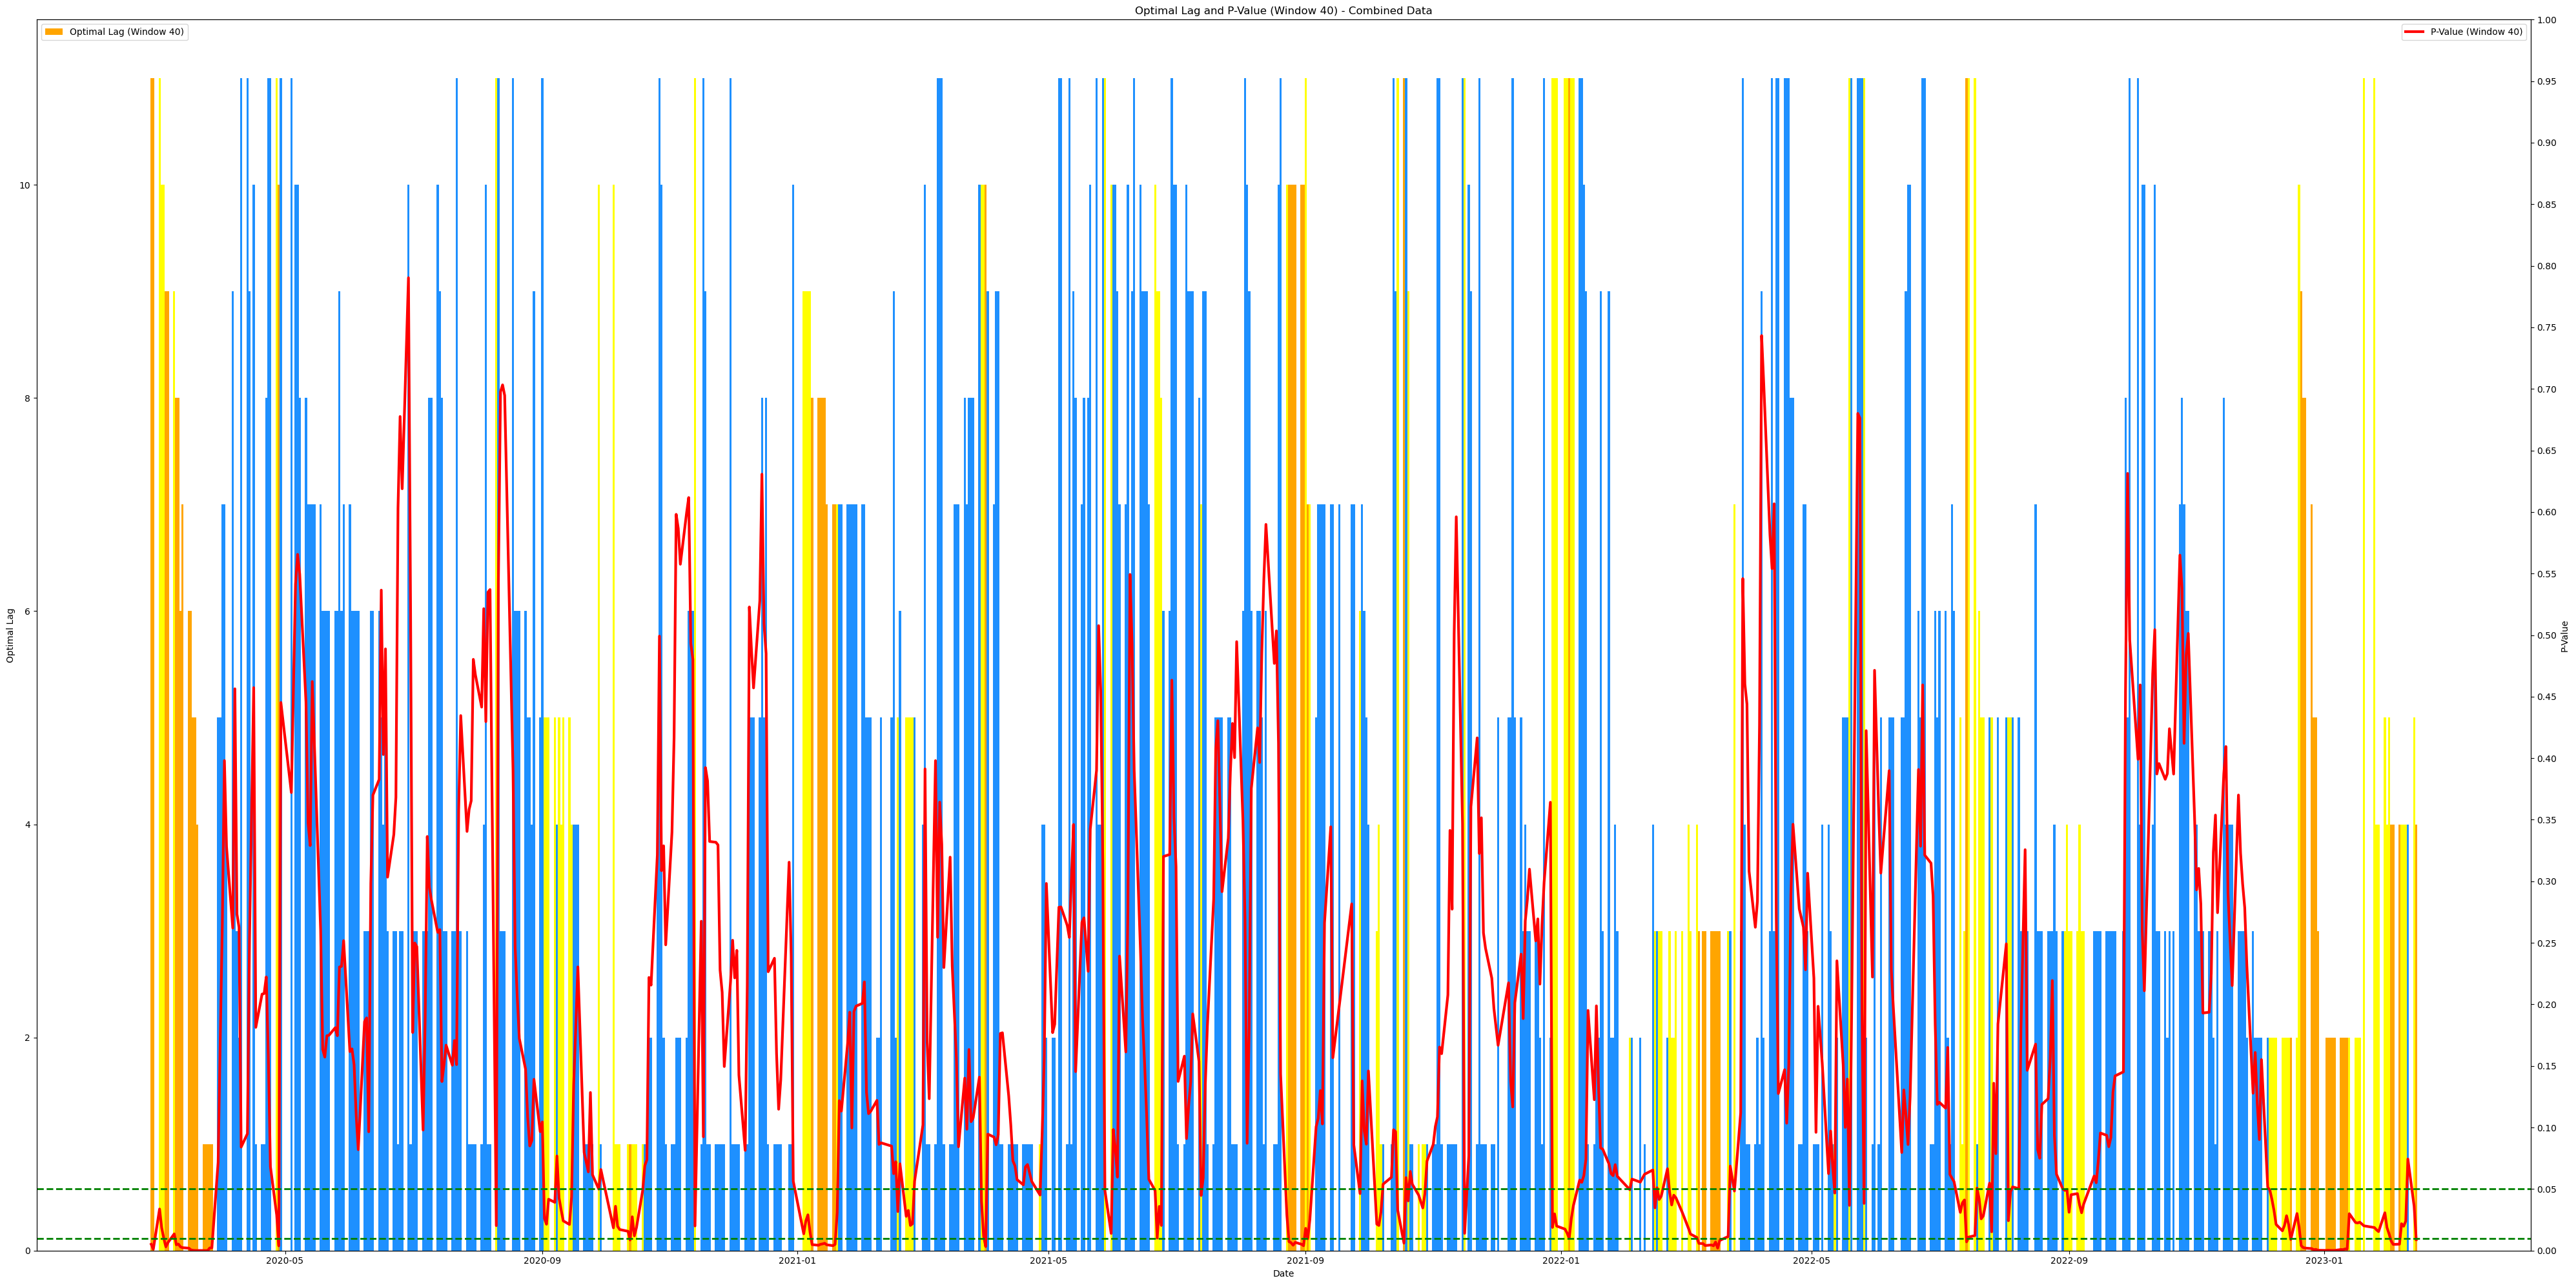

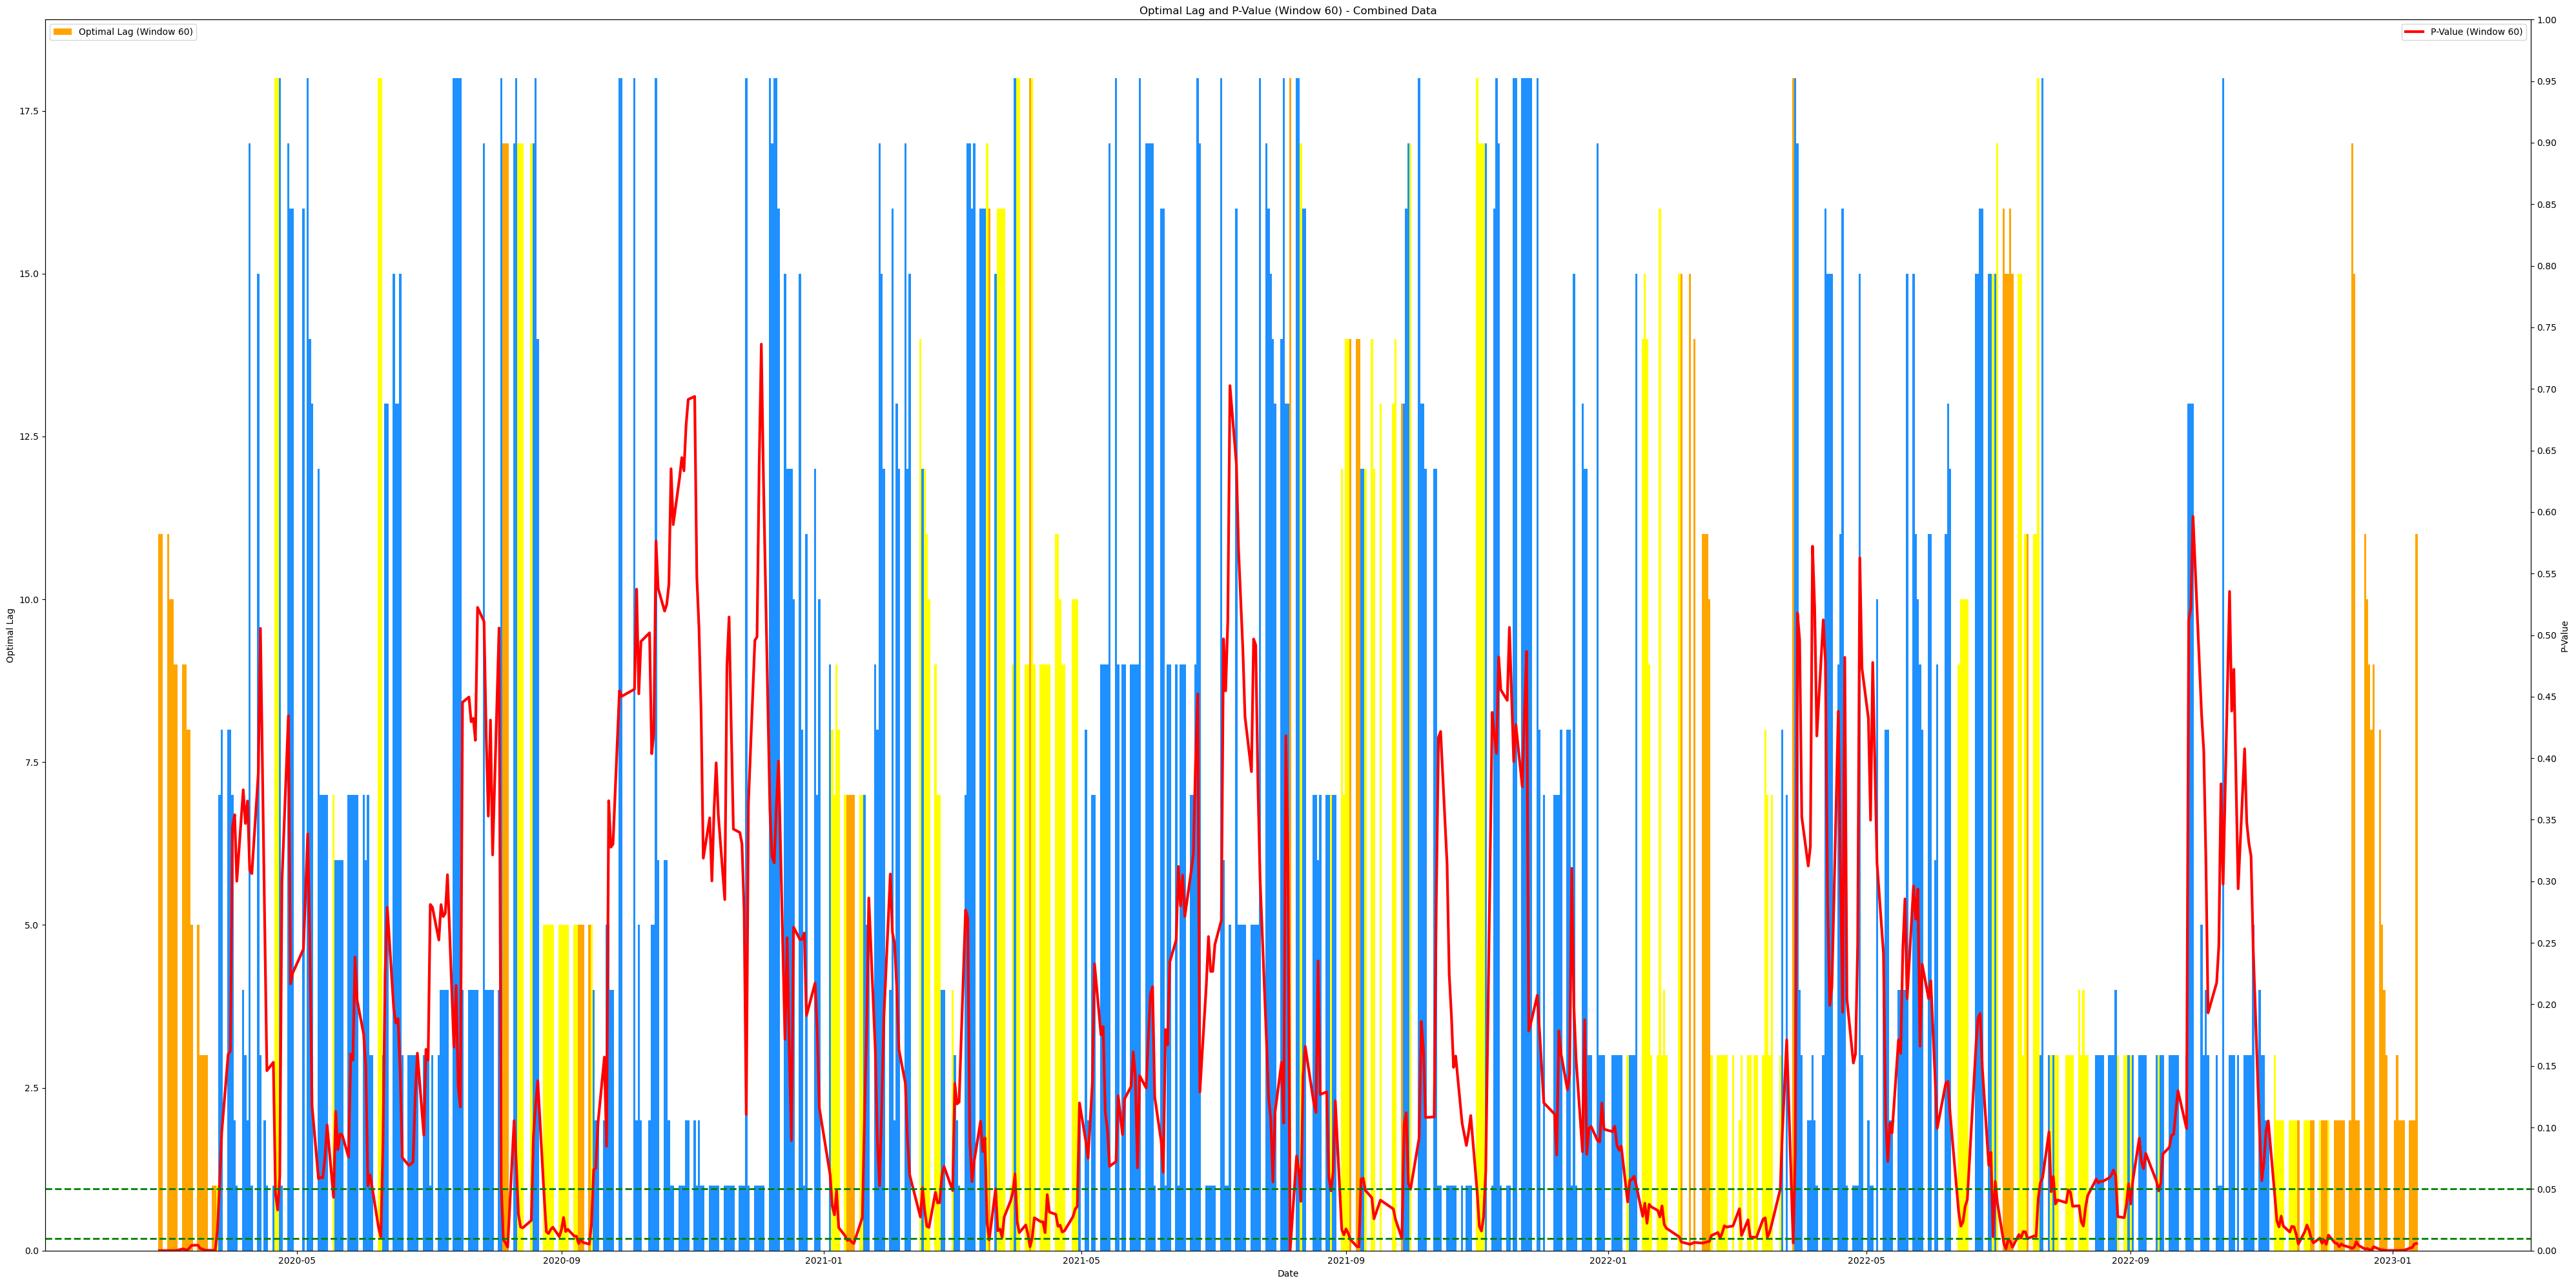

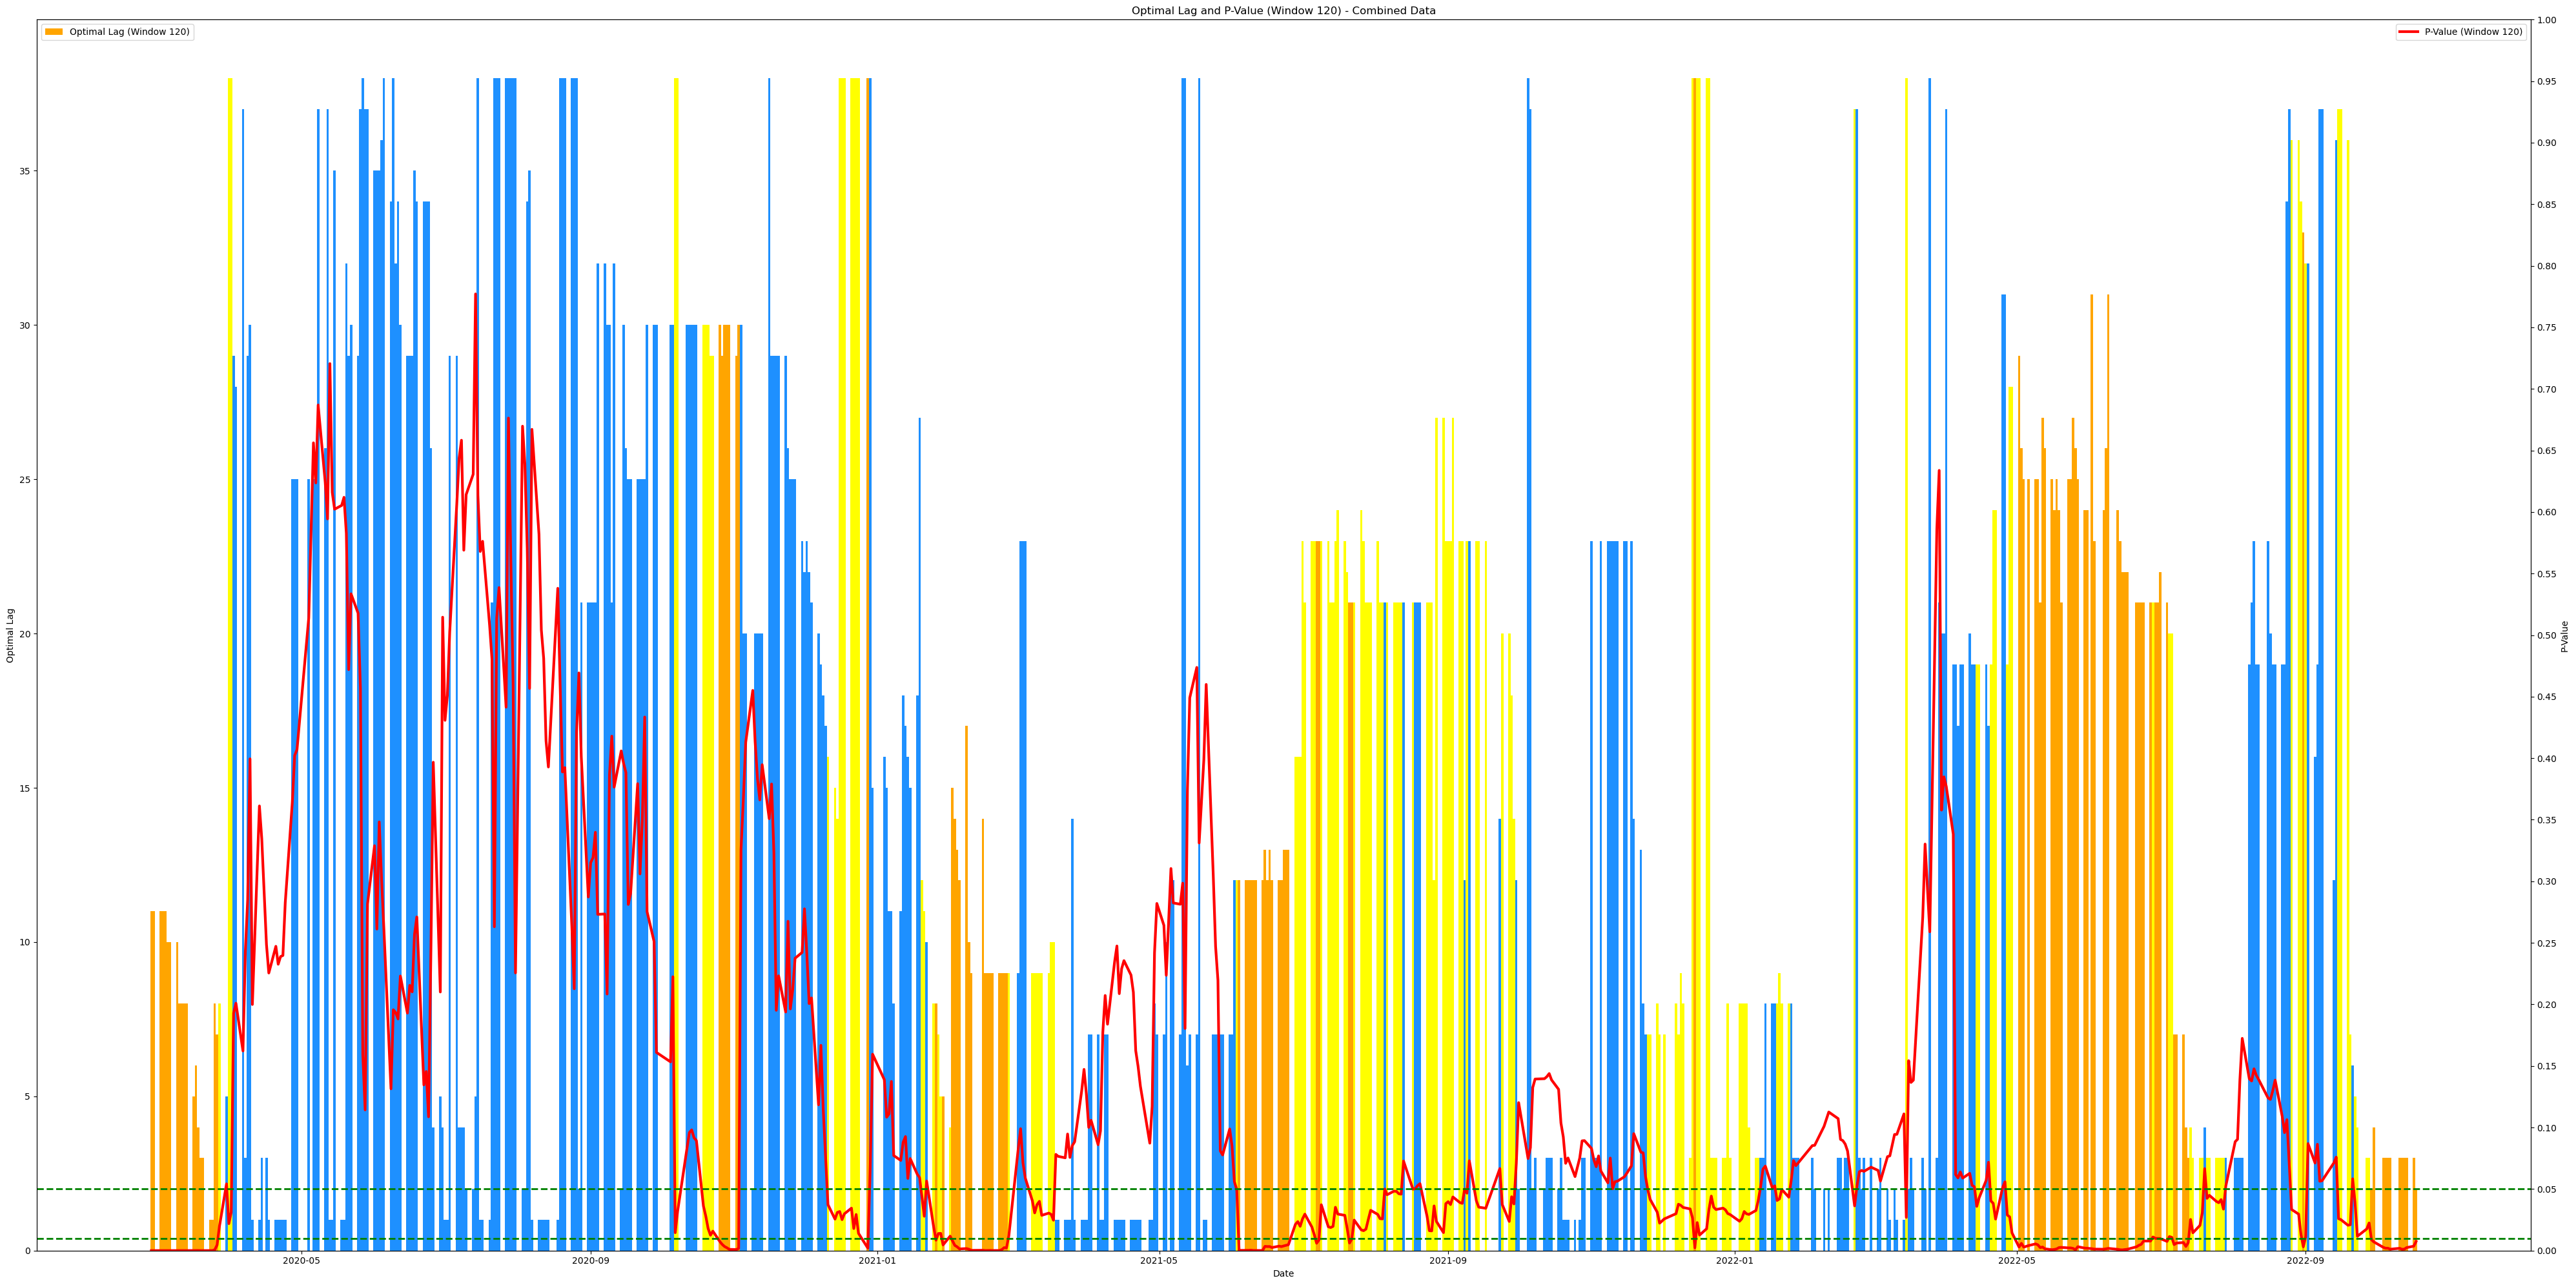

In [296]:
from matplotlib.ticker import MultipleLocator

def plot_lag_pvalues(df_combined, window):
    # 그래프 크기 설정
    fig, ax1 = plt.subplots(figsize=(40, 20))

    # 조건에 따라 색상 설정
    colors_combined = np.where(df_combined[f'p_value_{window}'] <= 0.01, 'orange', 
                               np.where(df_combined[f'p_value_{window}'] <= 0.05, 'yellow', 'dodgerblue'))

    # 바 플롯에 조건에 따른 색상을 적용
    ax1.bar(df_combined['Date'], df_combined[f'optimal_lag_{window}'], width=1, alpha=1, 
            color=colors_combined, label=f'Optimal Lag (Window {window})')

    # 이중 축 생성
    ax2 = ax1.twinx()

    # P-value 그래프 (빨간색 선)
    ax2.plot(df_combined['Date'], df_combined[f'p_value_{window}'], label=f'P-Value (Window {window})', color='red', linewidth=3)
    ax2.set_ylim(0, 1)

    # y축 눈금 0.05 간격으로 설정
    ax2.yaxis.set_major_locator(MultipleLocator(0.05))

    # 초록색 가로선 추가
    ax2.axhline(y=0.01, color='green', linestyle='--', linewidth=2)
    ax2.axhline(y=0.05, color='green', linestyle='--', linewidth=2)

    # 축 레이블 및 제목 설정
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Optimal Lag')
    ax2.set_ylabel('P-Value')
    ax1.set_title(f'Optimal Lag and P-Value (Window {window}) - Combined Data')

    # 범례 설정
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# 각 window에 대해 그래프 출력
for window in windows:
    plot_lag_pvalues(df_combined, window)

### 결과 저장

#### 리스트에 저장

In [297]:
# """주의! : 이 셀은 첫 번째 실험할 때 딱 한 번 만! 돌릴 것, 안 그럼 계속 초기화됨
# 한 번 돌린 다음에는 무조건 이 셀은 주석 처리할 것!!!!"""

# etf_list = []
# exog_list = []
# orange_list = []
# yellow_list = []


In [298]:

window = 120

def count_colors(df, window, etf, exog):
    """ Count the number of 'orange' and 'yellow' occurrences based on p-value thresholds. """
    # Calculate the color based on p-value conditions
    colors = np.where(df[f'p_value_{window}'] <= 0.01, 'orange',
                      np.where(df[f'p_value_{window}'] <= 0.05, 'yellow', 'dodgerblue'))
    
    # Count the occurrences of each color
    orange_count = np.sum(colors == 'orange')
    yellow_count = np.sum(colors == 'yellow')
    
    # Append results to lists
    etf_list.append(etf)
    exog_list.append(exog)
    orange_list.append(orange_count)
    yellow_list.append(yellow_count)

count_colors(df_combined, window, etf, exog)


etf_list

['TIGER_헬스케어',
 'TIGER_화장품',
 'TIGER_증권',
 'TIGER_중공업',
 'TIGER_은행',
 'TIGER_소프트웨어',
 'TIGER_방송통신',
 'TIGER_반도체',
 'TIGER200_건설',
 'TIGER200_경기소비재',
 'TIGER200_산업재',
 'TIGER200_철강소재',
 'TIGER200_에너지화학',
 'TIGER200_생활소비재',
 'TIGER200_생활소비재',
 'TIGER200_커뮤니케이션서비스',
 'TIGER200_IT',
 'TIGER_반도체',
 'TIGER_방송통신',
 'TIGER_소프트웨어',
 'TIGER_은행',
 'TIGER_중공업',
 'TIGER_증권',
 'TIGER_헬스케어',
 'TIGER_화장품',
 'TIGER200_건설',
 'TIGER200_경기소비재',
 'TIGER200_산업재',
 'TIGER200_생활소비재',
 'TIGER200_에너지화학',
 'TIGER200_철강소재',
 'TIGER200_커뮤니케이션서비스',
 'TIGER200_IT']

#### 리스트를 데이터프레임으로 저장

In [299]:
results_df = pd.DataFrame({
    'ETF': etf_list,
    'Exogenous Variable': exog_list,
    'Orange Count': orange_list,
    'Yellow Count': yellow_list
})

results_df = results_df.drop_duplicates(subset = ['ETF', 'Exogenous Variable'])
results_df

,ETF,Exogenous Variable,Orange Count,Yellow Count
0,TIGER_헬스케어,deathCnt_diff_perc,135,118
1,TIGER_화장품,deathCnt_diff_perc,53,183
2,TIGER_증권,deathCnt_diff_perc,115,127
3,TIGER_중공업,deathCnt_diff_perc,112,176
4,TIGER_은행,deathCnt_diff_perc,105,137
5,TIGER_소프트웨어,deathCnt_diff_perc,75,271
6,TIGER_방송통신,deathCnt_diff_perc,211,162
7,TIGER_반도체,deathCnt_diff_perc,112,176
8,TIGER200_건설,deathCnt_diff_perc,172,122
9,TIGER200_경기소비재,deathCnt_diff_perc,307,113


In [300]:
results_df["p <= 0.05"] = results_df['Orange Count'] + results_df["Yellow Count"] 
results_df

,ETF,Exogenous Variable,Orange Count,Yellow Count,p <= 0.05
0,TIGER_헬스케어,deathCnt_diff_perc,135,118,253
1,TIGER_화장품,deathCnt_diff_perc,53,183,236
2,TIGER_증권,deathCnt_diff_perc,115,127,242
3,TIGER_중공업,deathCnt_diff_perc,112,176,288
4,TIGER_은행,deathCnt_diff_perc,105,137,242
5,TIGER_소프트웨어,deathCnt_diff_perc,75,271,346
6,TIGER_방송통신,deathCnt_diff_perc,211,162,373
7,TIGER_반도체,deathCnt_diff_perc,112,176,288
8,TIGER200_건설,deathCnt_diff_perc,172,122,294
9,TIGER200_경기소비재,deathCnt_diff_perc,307,113,420


#### 별도의 파일로 저장

In [301]:
results_df.to_csv("result.csv", index = False)